In [ ]:
import pandas as pd
from google.colab import drive
import json
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive')

df_train = pd.read_csv("/content/drive/MyDrive/DSC/DATA/train.csv")
df_items = pd.read_csv("/content/drive/MyDrive/DSC/DATA/item_metadata_filtered.csv")
with open("/content/drive/MyDrive/DSC/DATA/id_mappings.json", "r") as f:
    id_mappings = json.load(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_items

parent_asin main_category  \
0      B07WFSQXL5    All Beauty   
1      B08BV6F6BC    All Beauty   
2      B07Z818MLY    All Beauty   
3      B071DY8Z4B    All Beauty   
4      B0BTLTVR1X    All Beauty   
...           ...           ...   
77828  B000NE85S2           NaN   
77829  B076NZT5VY      Software   
77830  B001FSG0TQ           NaN   
77831  B0009STM5C      Software   
77832  B005ZK91KK      Software   

                                                   title  average_rating  \
0      PPY Eyelash Growth Serum ‚Äì Natural Ingredients...             3.9   
1      Wixar Natural Sea Moss Soap - (2 PACK) - Laven...             4.4   
2      7 Packs Deep Wave Crochet Hair 22 Inch Deep wa...             3.4   
3      BEWAVE Hair Brush Sponge Twist With Comb Hair ...             4.2   
4      Zydeco Chop Chop Cajun Seasoning Base, 8 Ounce...             4.7   
...                                                  ...             ...   
77828                     Quicken Family Lawyer (CD-ROM)             3.5   
77829  Ubuntu 16.04 Linux Desktop - 32-Bit 64-Bit Sup...             3.7   
77830              The Print Shop: Labels and Logos 2009             2.3   
77831  Jumpstart Advanced Kindergarten (PC & Mac) [OL...             3.7   
77832  Better Homes and Gardens Landscaping and Deck ...             3.0   

       rating_number  price                      store  \
0              114.0    NaN                        PPY   
1               41.0    NaN             WIXAR NATURALS   
2               10.0    NaN               Yun Mei Hair   
3               24.0    NaN                     BEWAVE   
4               21.0    NaN                    BORELTH   
...              ...    ...                        ...   
77828           14.0    NaN         Parsons Technology   
77829            4.0    NaN  BrownTech PC System Tools   
77830            4.0    NaN                     Encore   
77831            4.0    NaN        Knowledge Adventure   
77832           19.0    NaN            Chief Architect   

                                                features  \
0                                                     []   
1                                                     []   
2                                                     []   
3                                                     []   
4      ['All Natural blend of Dehydrated Onion, Dehyd...   
...                                                  ...   
77828  ["America's Best-Selling Legal Software!"\n 'P...   
77829  ['Ubuntu 16.04 Linux on 2 Disc DVD Set 32 Bit ...   
77830  ['Drag-and-drop design tools' 'Photo-realistic...   
77831  ['This 3-CD set uses a fun animal theme to int...   
77832  ['Create the perfect outdoor living space with...   

                                             description  \
0                                                     []   
1                                                     []   
2                                                     []   
3                                                     []   
4      ['Zydeco Chop Chop is a blend of Dehydrated On...   
...                                                  ...   
77828  ['86 Forms in 10 categories: Estate Planning (...   
77829  ['Ubuntu 16.04 "Xenial Xerus" 64-BIT & 32BIT L...   
77830  ['Everything you need to create impressive lab...   
77831  ['From the Manufacturer'\n 'The JumpStart Adva...   
77832  ['Product description'\n "You'll be amazed at ...   

                                                  images  \
0      {'hi_res': array(['https://m.media-amazon.com/...   
1      {'hi_res': array(['https://m.media-amazon.com/...   
2      {'hi_res': array(['https://m.media-amazon.com/...   
3      {'hi_res': array(['https://m.media-amazon.com/...   
4      {'hi_res': array(['https://m.media-amazon.com/...   
...                                                  ...   
77828  {'hi_res': array([None], dtype=object), 'large...   
77829  {'hi_res': array(['https://m.media-amazon.co

In [ ]:
df=df_items.copy()

In [ ]:
df.head(5)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77833 entries, 0 to 77832
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   parent_asin     77833 non-null  object 
 1   main_category   77720 non-null  object 
 2   title           77830 non-null  object 
 3   average_rating  77833 non-null  float64
 4   rating_number   76170 non-null  float64
 5   price           50162 non-null  float64
 6   store           75916 non-null  object 
 7   features        77833 non-null  object 
 8   description     77833 non-null  object 
 9   images          77833 non-null  object 
 10  categories      77833 non-null  object 
 11  image_count     77833 non-null  int64  
 12  has_images      77833 non-null  bool   
 13  image_urls      77833 non-null  object 
 14  category        77833 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(10)
memory usage: 8.4+ MB


average_rating  rating_number         price   image_count
count    77833.000000   7.617000e+04  50162.000000  77833.000000
mean         3.620678   6.739909e+02      4.828681      9.315830
std          0.614011   1.203217e+04     26.525784      7.129278
min          1.000000   1.000000e+00      0.000000      0.000000
25%          3.200000   1.500000e+01      0.000000      4.000000
50%          3.600000   4.200000e+01      0.000000      6.000000
75%          4.100000   1.430000e+02      0.990000     12.000000
max          5.000000   1.898759e+06   2325.000000    288.000000

In [ ]:
df.nunique()

parent_asin       77833
main_category         8
title             75867
average_rating       41
rating_number      3613
price              2136
store             33713
features          51521
description       53857
images            76714
categories          214
image_count          58
has_images            2
image_urls        76713
category              3
dtype: int64

In [ ]:
df.isnull().sum()

parent_asin           0
main_category       113
title                 3
average_rating        0
rating_number      1663
price             27671
store              1917
features              0
description           0
images                0
categories            0
image_count           0
has_images            0
image_urls            0
category              0
dtype: int64

In [ ]:
from collections import Counter
import re

all_words = " ".join(df['title'].dropna()).lower()
words = re.findall(r'\w+', all_words)
Counter(words).most_common(20)

[('for', 17031),
 ('and', 10738),
 ('hair', 10306),
 ('with', 7984),
 ('free', 6663),
 ('2', 5223),
 ('pack', 4647),
 ('3', 4259),
 ('of', 4230),
 ('1', 4050),
 ('nail', 4005),
 ('the', 3962),
 ('women', 3828),
 ('oz', 3128),
 ('natural', 3020),
 ('4', 2918),
 ('black', 2771),
 ('game', 2628),
 ('set', 2613),
 ('brush', 2597)]

(np.float64(-0.5), np.float64(1499.5), np.float64(1499.5), np.float64(-0.5))

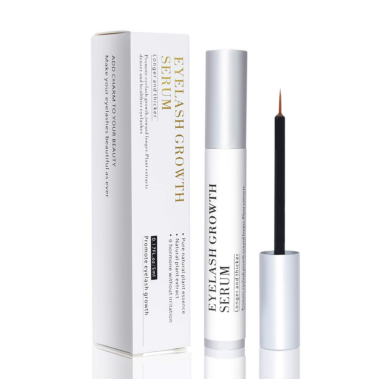

In [ ]:
import requests
from PIL import Image
from io import BytesIO

raw = df['image_urls'].dropna().iloc[0]
url = raw.strip("[]").replace("'", "").split(',')[0].strip()
response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.axis('off')

In [ ]:
df

parent_asin main_category  \
0      B07WFSQXL5    All Beauty   
1      B08BV6F6BC    All Beauty   
2      B07Z818MLY    All Beauty   
3      B071DY8Z4B    All Beauty   
4      B0BTLTVR1X    All Beauty   
...           ...           ...   
77828  B000NE85S2           NaN   
77829  B076NZT5VY      Software   
77830  B001FSG0TQ           NaN   
77831  B0009STM5C      Software   
77832  B005ZK91KK      Software   

                                                   title  average_rating  \
0      PPY Eyelash Growth Serum ‚Äì Natural Ingredients...             3.9   
1      Wixar Natural Sea Moss Soap - (2 PACK) - Laven...             4.4   
2      7 Packs Deep Wave Crochet Hair 22 Inch Deep wa...             3.4   
3      BEWAVE Hair Brush Sponge Twist With Comb Hair ...             4.2   
4      Zydeco Chop Chop Cajun Seasoning Base, 8 Ounce...             4.7   
...                                                  ...             ...   
77828                     Quicken Family Lawyer (CD-ROM)             3.5   
77829  Ubuntu 16.04 Linux Desktop - 32-Bit 64-Bit Sup...             3.7   
77830              The Print Shop: Labels and Logos 2009             2.3   
77831  Jumpstart Advanced Kindergarten (PC & Mac) [OL...             3.7   
77832  Better Homes and Gardens Landscaping and Deck ...             3.0   

       rating_number  price                      store  \
0              114.0    NaN                        PPY   
1               41.0    NaN             WIXAR NATURALS   
2               10.0    NaN               Yun Mei Hair   
3               24.0    NaN                     BEWAVE   
4               21.0    NaN                    BORELTH   
...              ...    ...                        ...   
77828           14.0    NaN         Parsons Technology   
77829            4.0    NaN  BrownTech PC System Tools   
77830            4.0    NaN                     Encore   
77831            4.0    NaN        Knowledge Adventure   
77832           19.0    NaN            Chief Architect   

                                                features  \
0                                                     []   
1                                                     []   
2                                                     []   
3                                                     []   
4      ['All Natural blend of Dehydrated Onion, Dehyd...   
...                                                  ...   
77828  ["America's Best-Selling Legal Software!"\n 'P...   
77829  ['Ubuntu 16.04 Linux on 2 Disc DVD Set 32 Bit ...   
77830  ['Drag-and-drop design tools' 'Photo-realistic...   
77831  ['This 3-CD set uses a fun animal theme to int...   
77832  ['Create the perfect outdoor living space with...   

                                             description  \
0                                                     []   
1                                                     []   
2                                                     []   
3                                                     []   
4      ['Zydeco Chop Chop is a blend of Dehydrated On...   
...                                                  ...   
77828  ['86 Forms in 10 categories: Estate Planning (...   
77829  ['Ubuntu 16.04 "Xenial Xerus" 64-BIT & 32BIT L...   
77830  ['Everything you need to create impressive lab...   
77831  ['From the Manufacturer'\n 'The JumpStart Adva...   
77832  ['Product description'\n "You'll be amazed at ...   

                                                  images  \
0      {'hi_res': array(['https://m.media-amazon.com/...   
1      {'hi_res': array(['https://m.media-amazon.com/...   
2      {'hi_res': array(['https://m.media-amazon.com/...   
3      {'hi_res': array(['https://m.media-amazon.com/...   
4      {'hi_res': array(['https://m.media-amazon.com/...   
...                                                  ...   
77828  {'hi_res': array([None], dtype=object), 'large...   
77829  {'hi_res': array(['https://m.media-amazon.co

<Axes: xlabel='average_rating', ylabel='Count'>

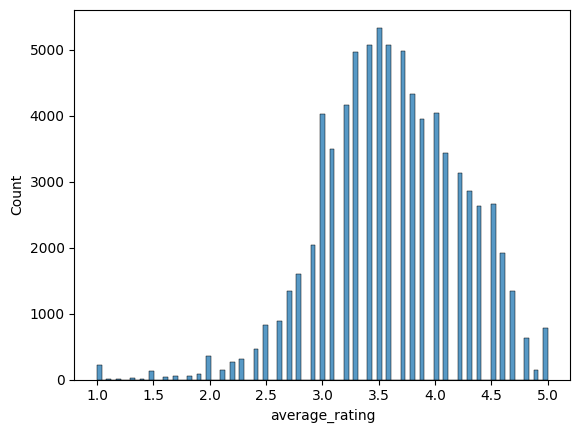

In [ ]:
sns.histplot(df["average_rating"])

<Axes: xlabel='category', ylabel='Count'>

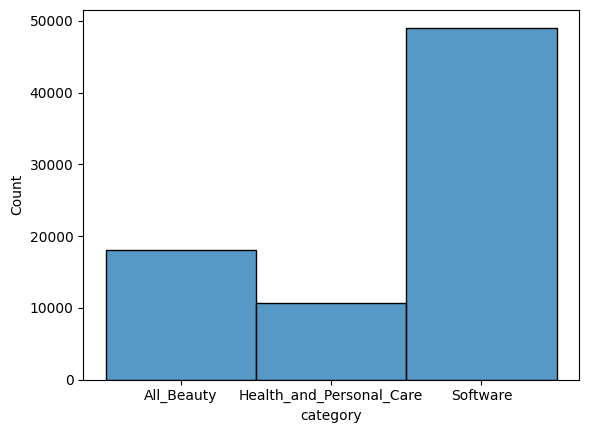

In [ ]:
sns.histplot(df["category"])

<Axes: xlabel='main_category', ylabel='Count'>

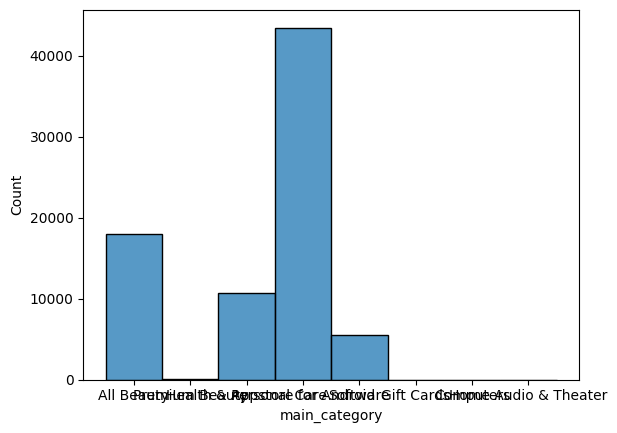

In [ ]:
sns.histplot(df['main_category'])

Kilks kategori ca≈Çkowicie dominuje dataset

<Axes: >

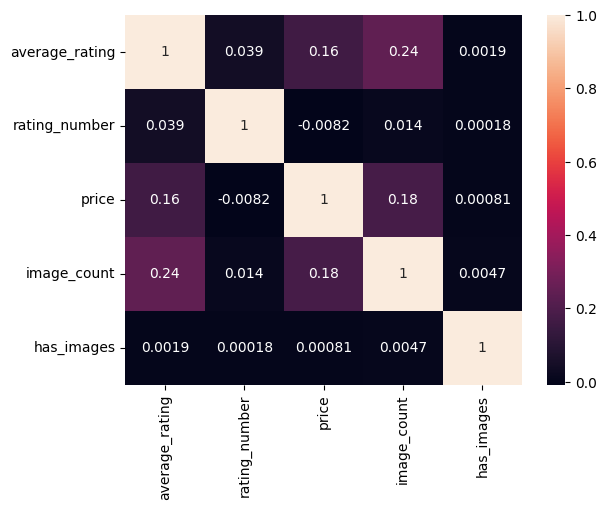

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: xlabel='price', ylabel='Count'>

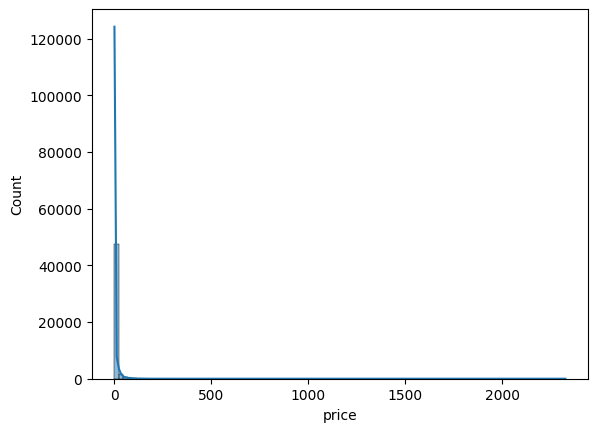

In [ ]:
sns.histplot(df['price'].dropna(), bins=100, kde=True)

Cena pokazuje rozk≈Çad prawostronny

<Axes: xlabel='has_images', ylabel='count'>

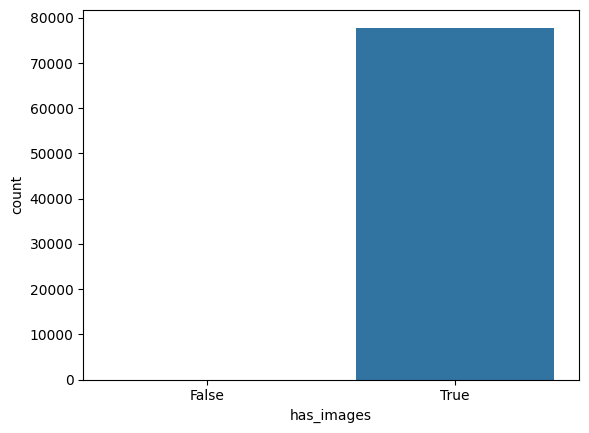

In [ ]:
sns.countplot(x=df['has_images'].dropna())

Brak item√≥w bez zdjƒôƒá

# Tekstowe

title

≈örednia d≈Çugo≈õƒá (znaki): 60.461308185474024
≈örednia d≈Çugo≈õƒá (tokeny): 9.704405586319428
Top 20 unigram√≥w: [('hair', np.int64(10306)), ('free', np.int64(6663)), ('pack', np.int64(4647)), ('nail', np.int64(4005)), ('women', np.int64(3828)), ('oz', np.int64(3128)), ('natural', np.int64(3020)), ('black', np.int64(2771)), ('game', np.int64(2628)), ('set', np.int64(2613)), ('brush', np.int64(2597)), ('games', np.int64(2207)), ('body', np.int64(2094)), ('kids', np.int64(2026)), ('3d', np.int64(2002)), ('makeup', np.int64(1972)), ('version', np.int64(1928)), ('skin', np.int64(1888)), ('kit', np.int64(1876)), ('men', np.int64(1830))]
Top 20 bigram√≥w: [('old version', np.int64(1548)), ('human hair', np.int64(850)), ('nail art', np.int64(756)), ('fl oz', np.int64(732)), ('men women', np.int64(666)), ('nail polish', np.int64(623)), ('long lasting', np.int64(533)), ('kindle tablet', np.int64(530)), ('hair extensions', np.int64(513)), ('tablet edition', np.int64(492)), ('hidden object', np

Text(0.5, 1.0, 'Rozk≈Çad warto≈õci IDF')

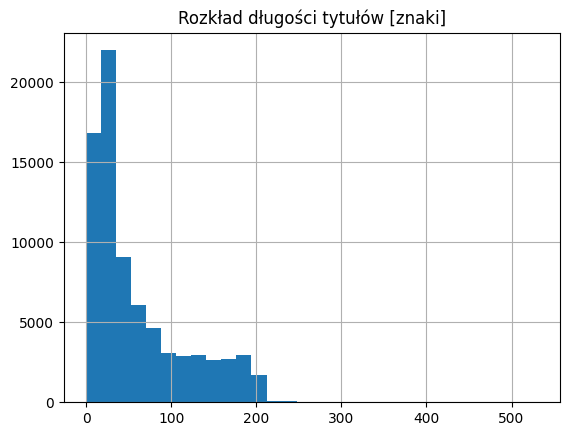

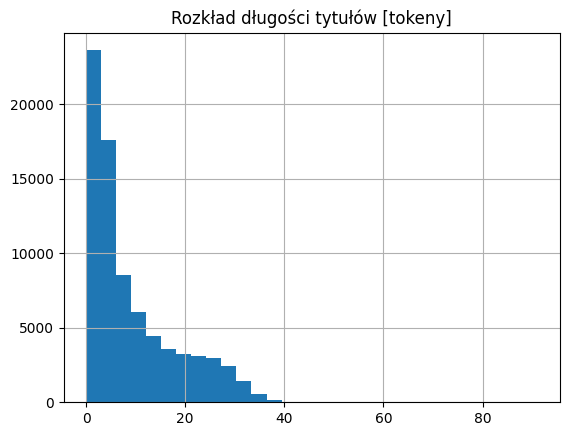

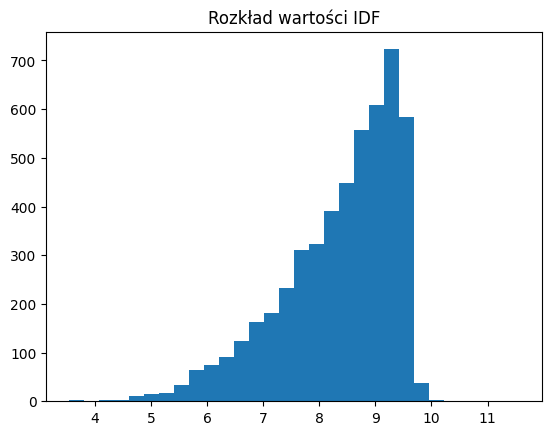

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

titles = df_items['title'].fillna('').str.lower()

char_lens = titles.str.len()
token_lens = titles.str.split().str.len()

print("≈örednia d≈Çugo≈õƒá (znaki):", char_lens.mean())
print("≈örednia d≈Çugo≈õƒá (tokeny):", token_lens.mean())

plt.figure(); char_lens.hist(bins=30); plt.title("Rozk≈Çad d≈Çugo≈õci tytu≈Ç√≥w [znaki]")
plt.figure(); token_lens.hist(bins=30); plt.title("Rozk≈Çad d≈Çugo≈õci tytu≈Ç√≥w [tokeny]")

cv_uni = CountVectorizer(ngram_range=(1,1), stop_words='english')
cv_bi  = CountVectorizer(ngram_range=(2,2), stop_words='english')

X_uni = cv_uni.fit_transform(titles)
X_bi  = cv_bi.fit_transform(titles)

# top 20 najczƒôstszych unigram√≥w i bigram√≥w
uni_counts = X_uni.sum(axis=0).A1
bi_counts  = X_bi.sum(axis=0).A1

uni_idx = uni_counts.argsort()[::-1][:20]
bi_idx  = bi_counts.argsort()[::-1][:20]

top_unigrams = [(cv_uni.get_feature_names_out()[i], uni_counts[i]) for i in uni_idx]
top_bigrams  = [(cv_bi.get_feature_names_out()[i],  bi_counts[i]) for i in bi_idx]

print("Top 20 unigram√≥w:", top_unigrams)
print("Top 20 bigram√≥w:", top_bigrams)

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf.fit(titles)
idf = tfidf.idf_
plt.figure(); plt.hist(idf, bins=30); plt.title("Rozk≈Çad warto≈õci IDF")


Wiƒôkszo≈õƒá tytu≈Ç√≥w nie przekracza 20 s≈Ç√≥w, ≈õrednia to 9.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

titles = df_items['title'].fillna('').str.lower()

cv = CountVectorizer(ngram_range=(1,1), stop_words='english')
_ = cv.fit_transform(titles)

vocab_size = len(cv.vocabulary_)
print(f"Liczba unikalnych s≈Ç√≥w w tytu≈Çach: {vocab_size}")


Liczba unikalnych s≈Ç√≥w w tytu≈Çach: 42081


In [ ]:


from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse

titles = df_items['title'].fillna('').str.lower()
tfidf = TfidfVectorizer(ngram_range=(1,1), min_df=10, max_df=0.5, max_features=1000)
X_title = tfidf.fit_transform(titles)


In [ ]:
X_title

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 408713 stored elements and shape (77833, 1000)>

In [ ]:
feature_names = tfidf.get_feature_names_out()
print(len(feature_names), feature_names[:20])


1000 ['10' '100' '11' '12' '120' '13' '14' '15' '16' '17' '18' '180' '1b' '20'
 '200' '2010' '2011' '2013' '2014' '2015']


##Przyk≈Çadowa reprezentacja jednego z tytu≈Ç√≥w przy pomocy Tfidf

Wagi s≈Ç√≥w odzwierciedlaja jak bardzo dane s≈Çowo charakteryzuje dany wektor (tytu≈Ç)

Ustala siƒô to na podstawie wystƒÖpie≈Ñ tego s≈Çowa w danym wektorze oraz w innych wektorach.

###1.Czƒôste wystƒôpowanie w ca≈Çej macierzy + czeste wystepowanie w danym wektorze = przeciƒôtna liczba, s≈Çowo nie jest jakies bardzo charakterystyczne dla danego wektora wzglƒôdem innych, ale jego czeste wystƒôpowanie zostanie dostrze≈ºone

###2.Rzadkie wystƒôpowanie w ca≈Çej macierzy + czeste wystepowanie w danym wektorze = du≈ºa liczba, s≈Çowo jest bardzo charakterystyczne dla danego wektora

itd.


In [ ]:
feature_names = tfidf.get_feature_names_out()

row = X_title.getrow(0)

idxs = row.indices
vals = row.data

for i, v in zip(idxs, vals):
    print(f"{feature_names[i]}: {v:.3f}")


eyelash: 0.267
growth: 0.608
serum: 0.292
natural: 0.188
ingredients: 0.317
advanced: 0.302
formula: 0.284
and: 0.140
lashes: 0.250
white: 0.235
pack: 0.168


#features

≈örednia d≈Çugo≈õƒá (znaki): 235.40259273058984
≈örednia d≈Çugo≈õƒá (tokeny): 36.650932123906315


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



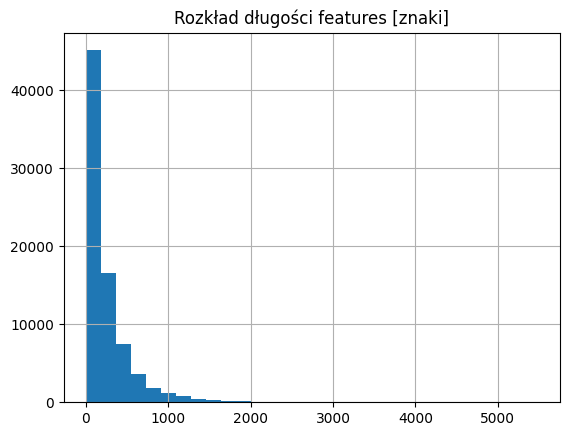

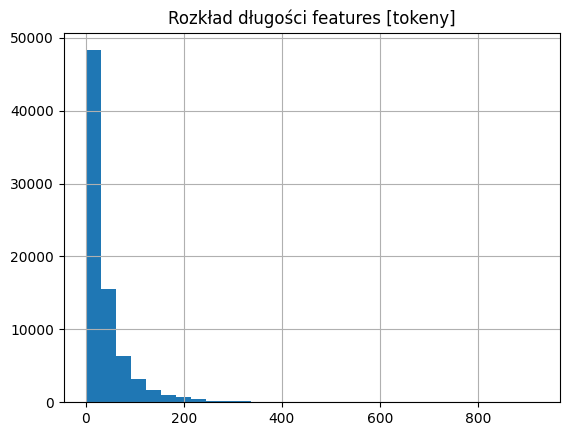

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

features = df_items['features'].fillna('').str.lower()

char_lens = features.str.len()
token_lens = features.str.split().str.len()

print("≈örednia d≈Çugo≈õƒá (znaki):", char_lens.mean())
print("≈örednia d≈Çugo≈õƒá (tokeny):", token_lens.mean())

# histogram
plt.figure(); char_lens.hist(bins=30); plt.title("Rozk≈Çad d≈Çugo≈õci features [znaki]")
plt.figure(); token_lens.hist(bins=30); plt.title("Rozk≈Çad d≈Çugo≈õci features [tokeny]")

cv_uni = CountVectorizer(ngram_range=(1,1), stop_words='english')
cv_bi  = CountVectorizer(ngram_range=(2,2), stop_words='english')

X_uni = cv_uni.fit_transform(features)
X_bi  = cv_bi.fit_transform(features)

# top 20 najczƒôstszych unigram√≥w i bigram√≥w
uni_counts = X_uni.sum(axis=0).A1
bi_counts  = X_bi.sum(axis=0).A1

uni_idx = uni_counts.argsort()[::-1][:20]
bi_idx  = bi_counts.argsort()[::-1][:20]

top_unigrams = [(cv_uni.get_feature_names_out()[i], uni_counts[i]) for i in uni_idx]
top_bigrams  = [(cv_bi.get_feature_names_out()[i],  bi_counts[i]) for i in bi_idx]

print("Top 20 unigram√≥w:", top_unigrams)
print("Top 20 bigram√≥w:", top_bigrams)

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf.fit(features)
idf = tfidf.idf_
plt.figure(); plt.hist(idf, bins=30); plt.title("Rozk≈Çad warto≈õci IDF")


Features jest nieco d≈Çu≈ºsze, ale mo≈ºemy zakodowaƒá je tak samo jak title

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse

# 1. Przygotuj tekst
feats = df_items['features'].fillna('').str.lower()

# 2. Utw√≥rz TF-IDF
tfidf_feats = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=20,
    max_df=0.7,
    max_features=2000,
    stop_words=['easy','use','free','game','play']
)

X_feats = tfidf_feats.fit_transform(feats)

print("Wymiar macierzy features:", X_feats.shape)
print("Przyk≈Çadowe cechy:", tfidf_feats.get_feature_names_out()[:10])



In [ ]:
feature_names = tfidf_feats.get_feature_names_out()

row = X_feats.getrow(5)

for idx, val in zip(row.indices, row.data):
    print(f"{feature_names[idx]:<20} {val:.3f}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


nnz_per_row = X_feats.getnnz(axis=1)


plt.figure()
plt.hist(nnz_per_row, bins=30)
plt.title("Rozk≈Çad liczby nie-zerowych cech w macierzy `features`")
plt.xlabel("Liczba nie-zerowych element√≥w w wektorze")
plt.ylabel("Liczba przedmiot√≥w")
plt.show()


print("Min:", nnz_per_row.min())
print("25. percentyl:", np.percentile(nnz_per_row, 25))
print("Mediana:", np.median(nnz_per_row))
print("75. percentyl:", np.percentile(nnz_per_row, 75))
print("Max:", nnz_per_row.max())


#description

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

description = df_items['description'].fillna('').str.lower()

char_lens = description.str.len()
token_lens = description.str.split().str.len()

print("≈örednia d≈Çugo≈õƒá (znaki):", char_lens.mean())
print("≈örednia d≈Çugo≈õƒá (tokeny):", token_lens.mean())

# histogramy
plt.figure(); char_lens.hist(bins=30); plt.title("Rozk≈Çad d≈Çugo≈õci description [znaki]")
plt.figure(); token_lens.hist(bins=30); plt.title("Rozk≈Çad d≈Çugo≈õci description [tokeny]")
plt.show()

cv_uni = CountVectorizer(ngram_range=(1,1), stop_words='english')
cv_bi  = CountVectorizer(ngram_range=(2,2), stop_words='english')

X_uni = cv_uni.fit_transform(description)
X_bi  = cv_bi.fit_transform(description)

uni_counts = X_uni.sum(axis=0).A1
bi_counts  = X_bi.sum(axis=0).A1

uni_idx = uni_counts.argsort()[::-1][:20]
bi_idx  = bi_counts.argsort()[::-1][:20]

top_unigrams = [(cv_uni.get_feature_names_out()[i], uni_counts[i]) for i in uni_idx]
top_bigrams  = [(cv_bi.get_feature_names_out()[i],  bi_counts[i]) for i in bi_idx]

print("Top 20 unigram√≥w:", top_unigrams)
print("Top 20 bigram√≥w:", top_bigrams)

tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=50,
    max_df=0.8,
    max_features=5000,
    stop_words='english'
)
tfidf.fit(description)
idf = tfidf.idf_

plt.figure(); plt.hist(idf, bins=30); plt.title("Rozk≈Çad warto≈õci IDF")
plt.show()


Description jest statystycznie duzo d≈Çu≈ºsze niz inne cechy tekstowe, jest to bardziej szczeg√≥≈Çowa wersja features. To jak du≈ºa ilo≈õc kolumn reprezentuajƒÖcych description obciƒÖzy model nie jest warte tej informacji. Nie skorzystamy z description

# Zdjƒôcia

In [ ]:
df_items['image_urls'][0]

['https://m.media-amazon.com/images/I/615N6fkcn9L._SL1500_.jpg',
 'https://m.media-amazon.com/images/I/81VThfNtptL._SL1500_.jpg',
 'https://m.media-amazon.com/images/I/71U6hl1ancL._SL1500_.jpg',
 'https://m.media-amazon.com/images/I/71p2er91bHL._SL1500_.jpg',
 'https://m.media-amazon.com/images/I/71ZSKVbjDKL._SL1500_.jpg',
 'https://m.media-amazon.com/images/I/71ZKyAQreOL._SL1500_.jpg',
 'https://m.media-amazon.com/images/I/81TKaR25g7L._SL1500_.jpg',
 'https://m.media-amazon.com/images/I/81wSVZ-2nmL._SL1500_.jpg',
 'https://m.media-amazon.com/images/I/81qaY2mjEuL._SL1500_.jpg',
 'https://m.media-amazon.com/images/I/41yq3nUn6EL.jpg',
 'https://m.media-amazon.com/images/I/51SGg7l2S4L.jpg',
 'https://m.media-amazon.com/images/I/41t5-RO8F0L.jpg',
 'https://m.media-amazon.com/images/I/412svaaj2GL.jpg',
 'https://m.media-amazon.com/images/I/51hzxF+FEwL.jpg',
 'https://m.media-amazon.com/images/I/51yGSQO1M+L.jpg',
 'https://m.media-amazon.com/images/I/51pRl5qV0WL.jpg',
 'https://m.media-amazo

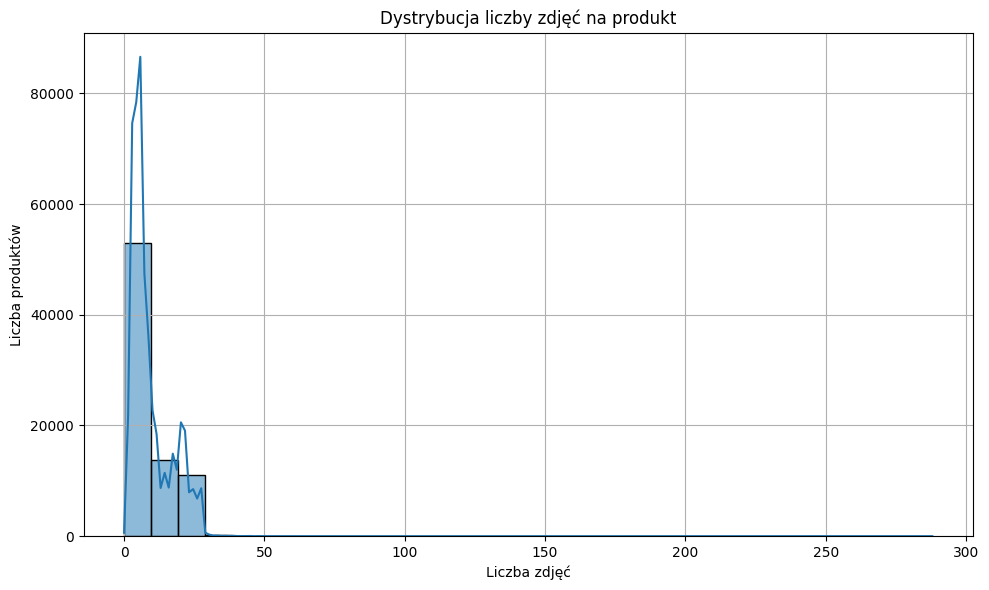

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_items['image_count'], bins=30, kde=True)

plt.title("Dystrybucja liczby zdjƒôƒá na produkt")
plt.xlabel("Liczba zdjƒôƒá")
plt.ylabel("Liczba produkt√≥w")
plt.grid(True)
plt.tight_layout()
plt.show()


Wiƒôszkosc produkt√≥w ma 0-10 zdjƒôƒá.
Zdjƒôcia sƒÖ wymagajƒÖce obliczeniowo. Dla ka≈ºdego produktu u≈ºyjemy jedynie 3 pierwszych zdjƒôƒá.

EMBEDDINGI ZDJƒòC

In [ ]:
import os
import torch
import numpy as np
from PIL import Image
import requests
from torchvision import models, transforms
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed
import warnings



import ast

df_items['image_urls'] = df_items['image_urls'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)



SAVE_PATH = "/content/drive/MyDrive/DSC/EMBEDDINGS/image_embeddings_dict.npy"
CHECKPOINT_EVERY = 1000

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("‚úÖ U≈ºywamy urzƒÖdzenia:", device)

resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])  # bez klasyfikatora
resnet.to(device).eval()

preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

def process_single_image(url):
    try:
        image = Image.open(requests.get(url, timeout=3, stream=True).raw).convert("RGB")
        image = preprocess(image).unsqueeze(0).to(device)
        with torch.no_grad():
            emb = resnet(image).squeeze().cpu().numpy()  # zrzut z GPU do CPU
        return emb
    except:
        return np.zeros(512)

def get_image_embeddings(image_urls, max_images=3):
    image_urls = image_urls[:max_images]
    embeddings = []

    with ThreadPoolExecutor(max_workers=max_images) as executor:
        futures = [executor.submit(process_single_image, url) for url in image_urls]
        for future in as_completed(futures):
            embeddings.append(future.result())

    while len(embeddings) < max_images:
        embeddings.append(np.zeros(512))

    return np.stack(embeddings)  # shape: (3, 512)

if os.path.exists(SAVE_PATH):
    embeddings_dict = np.load(SAVE_PATH, allow_pickle=True).item()
    print(f"üîÅ Wczytano zapis: {len(embeddings_dict)} produkt√≥w")
else:
    embeddings_dict = {}
    print("üÜï Nowy dict start")

# --- Filtrowanie brakujƒÖcych produkt√≥w ---
remaining_rows = df_items[~df_items["parent_asin"].isin(embeddings_dict.keys())]
print(f"üì¶ Do przetworzenia: {len(remaining_rows)} produkt√≥w")

# --- Pƒôtla g≈Ç√≥wna ---
for idx, row in tqdm(remaining_rows.iterrows(), total=len(remaining_rows)):
    item_id = row['parent_asin']
    urls = row['image_urls']

    if not isinstance(urls, list) or len(urls) == 0:
        embeddings_dict[item_id] = np.zeros((3, 512))
        continue

    try:
        emb = get_image_embeddings(urls, max_images=3)
    except Exception as e:
        warnings.warn(f"B≈ÇƒÖd dla produktu {item_id}: {e}")
        emb = np.zeros((3, 512))

    embeddings_dict[item_id] = emb

    if (idx + 1) % CHECKPOINT_EVERY == 0:
        np.save(SAVE_PATH, embeddings_dict)
        print(f"üíæ Zapisano checkpoint: {idx+1} produkt√≥w")

np.save(SAVE_PATH, embeddings_dict)
print("‚úÖ Przetwarzanie zako≈Ñczone i zapisane")


‚úÖ U≈ºywamy urzƒÖdzenia: cuda
üÜï Nowy dict start
üì¶ Do przetworzenia: 77833 produkt√≥w


  1%|‚ñè         | 1000/77833 [03:29<13:47:48,  1.55it/s]

üíæ Zapisano checkpoint: 1000 produkt√≥w


  3%|‚ñé         | 2001/77833 [07:01<4:43:34,  4.46it/s]

üíæ Zapisano checkpoint: 2000 produkt√≥w


  4%|‚ñç         | 3000/77833 [10:27<6:47:29,  3.06it/s]

üíæ Zapisano checkpoint: 3000 produkt√≥w


  5%|‚ñå         | 4000/77833 [14:14<8:33:21,  2.40it/s]

üíæ Zapisano checkpoint: 4000 produkt√≥w


  6%|‚ñã         | 5001/77833 [17:40<4:17:04,  4.72it/s]

üíæ Zapisano checkpoint: 5000 produkt√≥w


  8%|‚ñä         | 6000/77833 [21:33<4:33:11,  4.38it/s]

üíæ Zapisano checkpoint: 6000 produkt√≥w


  9%|‚ñâ         | 7000/77833 [25:25<5:28:49,  3.59it/s]

üíæ Zapisano checkpoint: 7000 produkt√≥w


 10%|‚ñà         | 8001/77833 [29:15<5:00:20,  3.88it/s]

üíæ Zapisano checkpoint: 8000 produkt√≥w


 12%|‚ñà‚ñè        | 9001/77833 [34:05<3:37:50,  5.27it/s]

üíæ Zapisano checkpoint: 9000 produkt√≥w


 13%|‚ñà‚ñé        | 10000/77833 [38:17<9:24:39,  2.00it/s]

üíæ Zapisano checkpoint: 10000 produkt√≥w


 14%|‚ñà‚ñç        | 11001/77833 [42:32<9:23:15,  1.98it/s] 

üíæ Zapisano checkpoint: 11000 produkt√≥w


 15%|‚ñà‚ñå        | 12001/77833 [47:08<4:04:00,  4.50it/s]

üíæ Zapisano checkpoint: 12000 produkt√≥w


 17%|‚ñà‚ñã        | 13001/77833 [51:09<4:15:08,  4.23it/s]

üíæ Zapisano checkpoint: 13000 produkt√≥w


 18%|‚ñà‚ñä        | 14001/77833 [54:59<3:52:57,  4.57it/s]

üíæ Zapisano checkpoint: 14000 produkt√≥w


 19%|‚ñà‚ñâ        | 15001/77833 [58:50<4:30:56,  3.87it/s]

üíæ Zapisano checkpoint: 15000 produkt√≥w


 21%|‚ñà‚ñà        | 16001/77833 [1:03:20<6:18:31,  2.72it/s]

üíæ Zapisano checkpoint: 16000 produkt√≥w


 22%|‚ñà‚ñà‚ñè       | 17001/77833 [1:07:24<5:13:02,  3.24it/s]

üíæ Zapisano checkpoint: 17000 produkt√≥w


 23%|‚ñà‚ñà‚ñé       | 18001/77833 [1:10:55<4:45:27,  3.49it/s]

üíæ Zapisano checkpoint: 18000 produkt√≥w


 24%|‚ñà‚ñà‚ñç       | 19001/77833 [1:15:11<5:27:58,  2.99it/s]

üíæ Zapisano checkpoint: 19000 produkt√≥w


 26%|‚ñà‚ñà‚ñå       | 20000/77833 [1:19:21<7:22:59,  2.18it/s]

üíæ Zapisano checkpoint: 20000 produkt√≥w


 27%|‚ñà‚ñà‚ñã       | 21000/77833 [1:23:03<6:24:47,  2.46it/s]

üíæ Zapisano checkpoint: 21000 produkt√≥w


 28%|‚ñà‚ñà‚ñä       | 22001/77833 [1:26:51<4:18:27,  3.60it/s]

üíæ Zapisano checkpoint: 22000 produkt√≥w


 30%|‚ñà‚ñà‚ñâ       | 23000/77833 [1:31:42<7:25:50,  2.05it/s]

üíæ Zapisano checkpoint: 23000 produkt√≥w


 31%|‚ñà‚ñà‚ñà       | 24001/77833 [1:36:17<5:24:31,  2.76it/s]

üíæ Zapisano checkpoint: 24000 produkt√≥w


 32%|‚ñà‚ñà‚ñà‚ñè      | 25001/77833 [1:40:22<4:07:40,  3.56it/s]

üíæ Zapisano checkpoint: 25000 produkt√≥w


 33%|‚ñà‚ñà‚ñà‚ñé      | 26001/77833 [1:44:00<5:33:31,  2.59it/s]

üíæ Zapisano checkpoint: 26000 produkt√≥w


 35%|‚ñà‚ñà‚ñà‚ñç      | 27001/77833 [1:48:04<6:37:00,  2.13it/s]

üíæ Zapisano checkpoint: 27000 produkt√≥w


 36%|‚ñà‚ñà‚ñà‚ñå      | 28001/77833 [1:51:50<5:55:28,  2.34it/s]

üíæ Zapisano checkpoint: 28000 produkt√≥w


 37%|‚ñà‚ñà‚ñà‚ñã      | 29001/77833 [1:55:19<4:31:00,  3.00it/s]

üíæ Zapisano checkpoint: 29000 produkt√≥w


 39%|‚ñà‚ñà‚ñà‚ñä      | 30000/77833 [1:59:28<7:47:12,  1.71it/s]

üíæ Zapisano checkpoint: 30000 produkt√≥w


 40%|‚ñà‚ñà‚ñà‚ñâ      | 31000/77833 [2:03:48<9:26:33,  1.38it/s]

üíæ Zapisano checkpoint: 31000 produkt√≥w


 41%|‚ñà‚ñà‚ñà‚ñà      | 32000/77833 [2:08:56<8:01:26,  1.59it/s]

üíæ Zapisano checkpoint: 32000 produkt√≥w


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 33000/77833 [2:13:54<7:48:27,  1.60it/s]

üíæ Zapisano checkpoint: 33000 produkt√≥w


 44%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 34000/77833 [2:18:30<7:07:20,  1.71it/s]

üíæ Zapisano checkpoint: 34000 produkt√≥w


 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 34695/77833 [2:21:20<2:23:36,  5.01it/s]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 35000/77833 [2:22:44<8:31:47,  1.39it/s]

üíæ Zapisano checkpoint: 35000 produkt√≥w


 46%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 36000/77833 [2:26:58<8:34:10,  1.36it/s]

üíæ Zapisano checkpoint: 36000 produkt√≥w


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 37000/77833 [2:31:47<7:51:33,  1.44it/s]

üíæ Zapisano checkpoint: 37000 produkt√≥w


 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 38000/77833 [2:36:19<6:33:43,  1.69it/s]

üíæ Zapisano checkpoint: 38000 produkt√≥w


 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 39000/77833 [2:40:49<8:22:46,  1.29it/s]

üíæ Zapisano checkpoint: 39000 produkt√≥w


 51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 40000/77833 [2:46:06<16:47:11,  1.60s/it]

üíæ Zapisano checkpoint: 40000 produkt√≥w


 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 41001/77833 [2:51:05<5:31:18,  1.85it/s]

üíæ Zapisano checkpoint: 41000 produkt√≥w


 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 42000/77833 [2:55:54<7:00:16,  1.42it/s]

üíæ Zapisano checkpoint: 42000 produkt√≥w


 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 43000/77833 [3:00:25<6:53:11,  1.41it/s]

üíæ Zapisano checkpoint: 43000 produkt√≥w


 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 44000/77833 [3:05:08<6:03:37,  1.55it/s]

üíæ Zapisano checkpoint: 44000 produkt√≥w


 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 45000/77833 [3:10:10<5:24:48,  1.68it/s]

üíæ Zapisano checkpoint: 45000 produkt√≥w


 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 46000/77833 [3:15:02<15:30:25,  1.75s/it]

üíæ Zapisano checkpoint: 46000 produkt√≥w


 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 47000/77833 [3:20:17<10:36:47,  1.24s/it]

üíæ Zapisano checkpoint: 47000 produkt√≥w


 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 48001/77833 [3:25:50<10:13:09,  1.23s/it]

üíæ Zapisano checkpoint: 48000 produkt√≥w


 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 49000/77833 [3:30:07<7:07:23,  1.12it/s]

üíæ Zapisano checkpoint: 49000 produkt√≥w


 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 50001/77833 [3:34:22<4:33:59,  1.69it/s]

üíæ Zapisano checkpoint: 50000 produkt√≥w


 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 51001/77833 [3:38:41<7:16:50,  1.02it/s]

üíæ Zapisano checkpoint: 51000 produkt√≥w


 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 52000/77833 [3:43:01<14:27:20,  2.01s/it]

üíæ Zapisano checkpoint: 52000 produkt√≥w


 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 53001/77833 [3:47:44<11:39:31,  1.69s/it]

üíæ Zapisano checkpoint: 53000 produkt√≥w


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 54001/77833 [3:52:28<7:37:15,  1.15s/it] 

üíæ Zapisano checkpoint: 54000 produkt√≥w


 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 55001/77833 [3:56:50<9:28:32,  1.49s/it] 

üíæ Zapisano checkpoint: 55000 produkt√≥w


 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 56001/77833 [4:01:42<8:40:43,  1.43s/it] 

üíæ Zapisano checkpoint: 56000 produkt√≥w


 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 57001/77833 [4:06:06<3:47:09,  1.53it/s]

üíæ Zapisano checkpoint: 57000 produkt√≥w


 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 58000/77833 [4:10:17<12:57:10,  2.35s/it]

üíæ Zapisano checkpoint: 58000 produkt√≥w


 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 59000/77833 [4:14:48<11:25:04,  2.18s/it]

üíæ Zapisano checkpoint: 59000 produkt√≥w


 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 59452/77833 [4:17:50<1:52:57,  2.71it/s]

Batchowo zapisujemy embedingi do pliku,

In [ ]:
import os
import torch
import numpy as np
from PIL import Image
import requests
from torchvision import models, transforms
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed
import warnings

SAVE_PATH = "/content/drive/MyDrive/DSC/EMBEDDINGS/image_embeddings_dict.npy"
CHECKPOINT_EVERY = 1000

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("‚úÖ U≈ºywamy urzƒÖdzenia:", device)

resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])
resnet.to(device).eval()

preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

def process_single_image(url):
    try:
        image = Image.open(requests.get(url, timeout=3, stream=True).raw).convert("RGB")
        image = preprocess(image).unsqueeze(0).to(device)
        with torch.no_grad():
            emb = resnet(image).squeeze().cpu().numpy()
        return emb
    except:
        return np.zeros(512)

def get_image_embeddings(image_urls, max_images=3):
    image_urls = image_urls[:max_images]
    embeddings = []

    with ThreadPoolExecutor(max_workers=max_images) as executor:
        futures = [executor.submit(process_single_image, url) for url in image_urls]
        for future in as_completed(futures):
            embeddings.append(future.result())

    while len(embeddings) < max_images:
        embeddings.append(np.zeros(512))

    return np.stack(embeddings)  # shape: (3, 512)

if os.path.exists(SAVE_PATH):
    embeddings_dict = np.load(SAVE_PATH, allow_pickle=True).item()
    print(f"üîÅ Wczytano zapis: {len(embeddings_dict)} produkt√≥w")
else:
    embeddings_dict = {}
    print("üÜï Nowy dict start")

remaining_rows = df_items[~df_items["parent_asin"].isin(embeddings_dict.keys())]
print(f"üì¶ Do przetworzenia: {len(remaining_rows)} produkt√≥w")

for idx, row in tqdm(remaining_rows.iterrows(), total=len(remaining_rows)):
    item_id = row['parent_asin']
    urls = row['image_urls']

    if not isinstance(urls, list) or len(urls) == 0:
        embeddings_dict[item_id] = np.zeros((3, 512))
        continue

    try:
        emb = get_image_embeddings(urls, max_images=3)
    except Exception as e:
        warnings.warn(f"B≈ÇƒÖd dla produktu {item_id}: {e}")
        emb = np.zeros((3, 512))

    embeddings_dict[item_id] = emb

    if (idx + 1) % CHECKPOINT_EVERY == 0:
        np.save(SAVE_PATH, embeddings_dict)
        print(f"üíæ Zapisano checkpoint: {idx+1} produkt√≥w")

# --- Finalny zapis ---
np.save(SAVE_PATH, embeddings_dict)
print("‚úÖ Przetwarzanie zako≈Ñczone i zapisane")


‚úÖ U≈ºywamy urzƒÖdzenia: cpu


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 44.7M/44.7M [00:00<00:00, 163MB/s]


üîÅ Wczytano zapis: 59000 produkt√≥w
üì¶ Do przetworzenia: 18833 produkt√≥w


  5%|‚ñå         | 1000/18833 [08:08<10:55:08,  2.20s/it]

üíæ Zapisano checkpoint: 60000 produkt√≥w


 11%|‚ñà         | 2000/18833 [16:15<14:36:50,  3.13s/it]

üíæ Zapisano checkpoint: 61000 produkt√≥w


 12%|‚ñà‚ñè        | 2216/18833 [17:54<1:49:05,  2.54it/s]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
 16%|‚ñà‚ñå        | 3000/18833 [24:01<12:17:43,  2.80s/it]

üíæ Zapisano checkpoint: 62000 produkt√≥w


 21%|‚ñà‚ñà        | 4000/18833 [31:55<8:51:13,  2.15s/it]

üíæ Zapisano checkpoint: 63000 produkt√≥w


 27%|‚ñà‚ñà‚ñã       | 5000/18833 [40:10<11:03:40,  2.88s/it]

üíæ Zapisano checkpoint: 64000 produkt√≥w


 32%|‚ñà‚ñà‚ñà‚ñè      | 6000/18833 [48:45<9:36:07,  2.69s/it]

üíæ Zapisano checkpoint: 65000 produkt√≥w


 37%|‚ñà‚ñà‚ñà‚ñã      | 7000/18833 [57:39<10:41:00,  3.25s/it]

üíæ Zapisano checkpoint: 66000 produkt√≥w


 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 8000/18833 [1:06:20<8:48:18,  2.93s/it]

üíæ Zapisano checkpoint: 67000 produkt√≥w


 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 9000/18833 [1:15:16<10:40:00,  3.91s/it]

üíæ Zapisano checkpoint: 68000 produkt√≥w


 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 10000/18833 [1:23:04<6:57:52,  2.84s/it]

üíæ Zapisano checkpoint: 69000 produkt√≥w


 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 11000/18833 [1:32:03<8:06:41,  3.73s/it]

üíæ Zapisano checkpoint: 70000 produkt√≥w


 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 12000/18833 [1:40:18<7:14:54,  3.82s/it]

üíæ Zapisano checkpoint: 71000 produkt√≥w


 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 13000/18833 [1:48:48<5:01:39,  3.10s/it]

üíæ Zapisano checkpoint: 72000 produkt√≥w


 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 14000/18833 [1:57:19<5:40:56,  4.23s/it]

üíæ Zapisano checkpoint: 73000 produkt√≥w


 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 15000/18833 [2:05:04<1:59:43,  1.87s/it]

üíæ Zapisano checkpoint: 74000 produkt√≥w


 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 16000/18833 [2:13:21<2:21:52,  3.00s/it]

üíæ Zapisano checkpoint: 75000 produkt√≥w


 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 17000/18833 [2:21:38<2:14:09,  4.39s/it]

üíæ Zapisano checkpoint: 76000 produkt√≥w


 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 18000/18833 [2:30:59<47:21,  3.41s/it]

üíæ Zapisano checkpoint: 77000 produkt√≥w


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 18833/18833 [2:38:21<00:00,  1.98it/s]


‚úÖ Przetwarzanie zako≈Ñczone i zapisane


In [ ]:
import numpy as np

np.save("/content/drive/MyDrive/DSC/EMBEDDINGS/image_embeddings_dict.npy", embeddings_dict)
